In [39]:
import pandas as pd
import numpy as np
import math
import random
from scipy import stats
import matplotlib.pyplot as plt


In [52]:
data = pd.read_csv('/gymreklab-tscc/cynthiawu/real_gene_correlation/SampleSize500/eigendecomp_snpermute/numTarget_0/Beta_0/Simulation_0/Matrixeqtl/gene-snp-eqtl', sep='\t')

In [9]:
pvalues = list(data['p-value'])

In [7]:
def calculate_cpma(pvalues):
    num_genes = len(pvalues)
    likelihood = 1/(np.mean(np.negative(np.log(pvalues))))
    value = -2 * ((((likelihood - 1) * num_genes)/likelihood) - num_genes*np.log(likelihood))
    if math.isnan(value):
        value = 0
    return value

In [27]:
calculate_cpma(random.sample(pvalues, 15000))

0.01919099326125462

In [21]:
pvalues_converted = 2*stats.norm.cdf(-np.abs(data['t-stat']))

In [25]:
pvalues_converted = list(pvalues_converted)

In [34]:
cpma_values = []
iterations = 500000
for i in range(iterations):
    cpma_values.append(calculate_cpma(random.sample(pvalues_converted, 15000)))

In [35]:
cpma_values

[0.09111710448443944,
 13.0365453990172,
 0.0027310523180954505,
 0.15871426353824347,
 0.0009700924989237691,
 0.4700034991973041,
 0.07126487794700154,
 1.8867715591873662,
 1.494526840385447,
 0.11219795692176149,
 0.08742136903842379,
 1.393658877591065,
 1.6806671640374589,
 0.7575677447623264,
 0.02502931470845482,
 0.3265661650295897,
 3.9788923646577246,
 1.2566113853036427,
 0.15383849100943792,
 0.865744346902801,
 0.09017515196384807,
 0.5110928227755949,
 0.384128730509417,
 0.9114650683237926,
 0.022408937875468382,
 0.0016730051392439549,
 1.9124025932438258,
 0.276349231438644,
 0.1923145292169295,
 0.14783434625226732,
 2.402678976730101,
 0.2052994434196478,
 0.06421353343526448,
 1.3970739045215623,
 1.8074608809914707,
 0.15041652173317743,
 0.0008702011991346126,
 0.08105071436987998,
 0.6268459159773272,
 0.04186482015295212,
 0.6248848081277458,
 1.4788184903896422,
 0.030818662815129017,
 0.47846738436962255,
 0.02310481967803213,
 3.0758814543150947,
 0.14585947

In [37]:
cpma_file = open("/gymreklab-tscc/cynthiawu/real_gene_correlation/SampleSize500/eigendecomp_snpermute/numTarget_0/Beta_0/Simulation_0/Matrixeqtl/sumstats_permute_null_cpma.txt", "w")
for value in cpma_values:
    cpma_file.write(f'{value}\n')
cpma_file.close()


(array([4.11453e+05, 6.28080e+04, 1.80810e+04, 5.35300e+03, 1.63000e+03,
        4.79000e+02, 1.37000e+02, 3.70000e+01, 1.70000e+01, 5.00000e+00]),
 array([2.02461153e-11, 2.70016545e+00, 5.40033090e+00, 8.10049636e+00,
        1.08006618e+01, 1.35008273e+01, 1.62009927e+01, 1.89011582e+01,
        2.16013236e+01, 2.43014891e+01, 2.70016545e+01]),
 <a list of 10 Patch objects>)

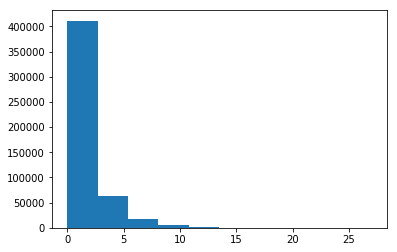

In [40]:
plt.hist(cpma_values)

In [44]:
eigendecomp = np.loadtxt('/gymreklab-tscc/cynthiawu/real_gene_correlation/SampleSize500/eigendecomp_snpermute/numTarget_0/Beta_0/Simulation_0/Matrixeqtl/gene-snp-eqtl_sim500000_cpma.gz')


(array([4.72543e+05, 2.26650e+04, 3.39700e+03, 9.28000e+02, 3.03000e+02,
        1.00000e+02, 3.80000e+01, 1.40000e+01, 8.00000e+00, 4.00000e+00]),
 array([    0.       ,  2222.5310783,  4445.0621566,  6667.5932349,
         8890.1243132, 11112.6553915, 13335.1864698, 15557.7175481,
        17780.2486264, 20002.7797047, 22225.310783 ]),
 <a list of 10 Patch objects>)

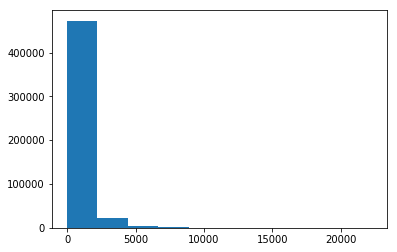

In [46]:
plt.hist(eigendecomp)

In [49]:
snp_permute = pd.read_csv('/gymreklab-tscc/cynthiawu/real_gene_correlation/SampleSize500/eigendecomp_snpermute/numTarget_0/Beta_0/Simulation_0/snp_permute/CPMA/cpma_null_permute', sep='\t')


(array([4.19041e+05, 6.81390e+04, 1.12990e+04, 1.30900e+03, 1.63000e+02,
        2.60000e+01, 1.60000e+01, 4.00000e+00, 0.00000e+00, 3.00000e+00]),
 array([1.12742997e-10, 1.93550271e+03, 3.87100542e+03, 5.80650813e+03,
        7.74201084e+03, 9.67751355e+03, 1.16130163e+04, 1.35485190e+04,
        1.54840217e+04, 1.74195244e+04, 1.93550271e+04]),
 <a list of 10 Patch objects>)

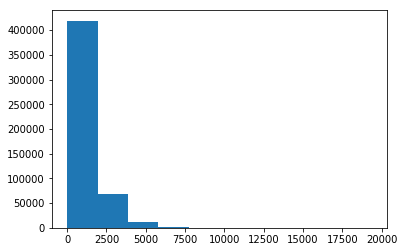

In [51]:
plt.hist(snp_permute['CPMA'])

In [53]:
data

,SNP,gene,beta,t-stat,p-value
0,SNP0,Gene0,-0.004678,-0.072937,0.941886
1,SNP0,Gene1,-0.055822,-0.871087,0.384127
2,SNP0,Gene2,0.027491,0.428745,0.668294
3,SNP0,Gene3,-0.036549,-0.570085,0.568877
4,SNP0,Gene4,-0.040920,-0.638320,0.523559
...,...,...,...,...,...
44999995,SNP2999,Gene14995,0.087996,1.435896,0.151660
44999996,SNP2999,Gene14996,-0.162343,-2.662338,0.008011
44999997,SNP2999,Gene14997,0.110431,1.804130,0.071815
44999998,SNP2999,Gene14998,-0.017589,-0.286438,0.774662


In [54]:
pvalues_converted = 2*stats.norm.cdf(-np.abs(data['t-stat']))

In [55]:
pvalues_converted

array([0.94185635, 0.38370681, 0.66810899, ..., 0.071211  , 0.7745425 ,
       0.50475042])

In [56]:
data['gene']

0               Gene0
1               Gene1
2               Gene2
3               Gene3
4               Gene4
              ...    
44999995    Gene14995
44999996    Gene14996
44999997    Gene14997
44999998    Gene14998
44999999    Gene14999
Name: gene, Length: 45000000, dtype: object

In [60]:
data.insert(5, 'pvalues_converted', pvalues_converted)

In [61]:
data

,SNP,gene,beta,t-stat,p-value,pvalues_converted
0,SNP0,Gene0,-0.004678,-0.072937,0.941886,0.941856
1,SNP0,Gene1,-0.055822,-0.871087,0.384127,0.383707
2,SNP0,Gene2,0.027491,0.428745,0.668294,0.668109
3,SNP0,Gene3,-0.036549,-0.570085,0.568877,0.568620
4,SNP0,Gene4,-0.040920,-0.638320,0.523559,0.523265
...,...,...,...,...,...,...
44999995,SNP2999,Gene14995,0.087996,1.435896,0.151660,0.151032
44999996,SNP2999,Gene14996,-0.162343,-2.662338,0.008011,0.007760
44999997,SNP2999,Gene14997,0.110431,1.804130,0.071815,0.071211
44999998,SNP2999,Gene14998,-0.017589,-0.286438,0.774662,0.774542


In [62]:
values_matrix = data.pivot_table(index='SNP', columns='gene', values='pvalues_converted')

In [57]:
?pd.pivot_table

In [63]:
values_matrix

gene,Gene0,Gene1,Gene10,Gene100,Gene1000,Gene10000,Gene10001,Gene10002,Gene10003,Gene10004,...,Gene9990,Gene9991,Gene9992,Gene9993,Gene9994,Gene9995,Gene9996,Gene9997,Gene9998,Gene9999
SNP,,,,,,,,,,,,,,,,,,,,,
SNP0,0.941856,0.383707,0.622806,0.997777,0.911275,0.763118,0.441657,0.573642,0.866708,0.570395,...,0.775614,0.305372,0.998713,0.104087,0.496643,0.697310,0.309204,0.509885,0.970096,0.472297
SNP1,0.217371,0.014465,0.904197,0.780254,0.149170,0.882743,0.858568,0.406722,0.045190,0.319014,...,0.325153,0.618053,0.464008,0.216116,0.065891,0.984557,0.680723,0.116027,0.857656,0.466379
SNP10,0.778359,0.326636,0.521641,0.844819,0.533077,0.369654,0.778329,0.464787,0.515708,0.883026,...,0.808429,0.346789,0.643861,0.659398,0.397850,0.763300,0.884057,0.666192,0.946732,0.428806
SNP100,0.421654,0.064993,0.291541,0.687107,0.216936,0.805252,0.720591,0.393309,0.069664,0.176818,...,0.990795,0.010683,0.831140,0.789205,0.306494,0.772585,0.383400,0.800547,0.286353,0.210260
SNP1000,0.161101,0.417552,0.856471,0.642336,0.503601,0.878823,0.890059,0.642956,0.574736,0.258477,...,0.968539,0.652706,0.557431,0.967301,0.751090,0.455623,0.624022,0.751625,0.951786,0.454103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SNP995,0.258890,0.087375,0.174282,0.927007,0.754609,0.845228,0.378500,0.838905,0.296500,0.970921,...,0.894996,0.781472,0.899055,0.212361,0.229820,0.714257,0.391096,0.625910,0.473578,0.535298
SNP996,0.090267,0.846227,0.403311,0.616427,0.392334,0.262184,0.190444,0.216861,0.908063,0.708270,...,0.448860,0.075110,0.828168,0.037118,0.887327,0.556306,0.065931,0.203429,0.498190,0.776378
SNP997,0.230862,0.622478,0.391528,0.348741,0.595555,0.560247,0.956153,0.145935,0.988238,0.054064,...,0.707713,0.198329,0.011434,0.163094,0.685633,0.116428,0.971495,0.516454,0.198434,0.053589


In [65]:
values_matrix_np = np.array(values_matrix)

In [82]:
np.array([[0,0], [0, 4], [4, 0]]).T.tolist()

[[0, 0, 4], [0, 4, 0]]

In [83]:
values_matrix_np[np.array([[0,0], [0, 4], [4, 0]]).T.tolist()]

/storage/cynthiawu/miniconda3/envs/python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  """Entry point for launching an IPython kernel.


array([0.94185635, 0.91127465, 0.161101  ])

In [77]:
np.take(values_matrix_np, [(0,0), [0, 4], [4, 0]])

array([[0.94185635, 0.94185635],
       [0.94185635, 0.91127465],
       [0.91127465, 0.94185635]])

In [89]:
[*range(15000)]

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [95]:
values_matrix_np[np.random.randint(0, 3000, size=15000), [range(15000)]]

array([[0.09385856, 0.63351922, 0.95317148, ..., 0.70659303, 0.68644167,
        0.63015243]])

In [85]:
?np.random.randint

In [109]:
cpma_values = []
iterations = 500000
for i in range(iterations):
    permuted_values = values_matrix_np[np.random.randint(0, 3000, size=15000), [range(15000)]]
    cpma_values.append(calculate_cpma(permuted_values))

In [110]:
cpma_values

[2.2986103327322406e-06,
 8.109219582847285e-05,
 0.00010423511784030115,
 0.00023653878206072315,
 9.235516642950876e-09,
 8.168386427558766e-05,
 8.45896074144932e-06,
 1.289180967996035e-06,
 0.00014948626246339553,
 0.0002269737468655296,
 2.7485985123225018e-05,
 1.651143302695661e-05,
 2.07675157769217e-06,
 0.00016296502331788337,
 5.314933533230506e-07,
 1.3752319340990839e-05,
 3.875790640401992e-05,
 1.5035379559652853e-07,
 8.745916690807223e-05,
 1.608063801974112e-05,
 5.6564551766190296e-05,
 0.00025988548589850335,
 2.8749258936557748e-05,
 2.0259138333294374e-06,
 0.0003972068725894076,
 0.0008230097613261267,
 2.1042511245636733e-05,
 9.345855036650697e-05,
 3.909604543164344e-05,
 8.531961623559417e-05,
 0.00024343014496783916,
 0.0001703463386396875,
 3.478296650693581e-05,
 2.207330396966807e-05,
 1.840595320382228e-05,
 3.718459132683906e-05,
 1.2783397919765432e-05,
 0.00015128432085933022,
 9.690063261255655e-05,
 0.0002945840832391314,
 0.00017329744433467256,
 

In [99]:
np.random.randint(0, 3000, size=15000), [range(15000)]

(array([ 516,  512, 1668, ..., 2395,  377, 1926]), [range(0, 15000)])

In [101]:
values_matrix_np.shape

(3000, 15000)

In [104]:
int(8.5477586999054e05)

854775

In [111]:
cpma_file = open("/gymreklab-tscc/cynthiawu/real_gene_correlation/SampleSize500/eigendecomp_snpermute/numTarget_0/Beta_0/Simulation_0/Matrixeqtl/sumstats_matrix_permute_null_cpma.txt", "w")
for value in cpma_values:
    cpma_file.write(f'{value}\n')
cpma_file.close()
